In [1]:
%load_ext autoreload
%autoreload 2

In [56]:
import os, sys
sys.path.append('../scripts/')
import geopandas as gpd
import shapely as shp
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from PIL import Image
from patchify import patchify, unpatchify


In [3]:
# filepaths **replace with folderpaths for batch later**

shp = r"../content/landscape_character_grid/selection_white_peak.shp"
tif = r"../content/tifs/189226695.27_clip.tif"
save = r"../content/tifs/10k_tifs/"

In [13]:
# read tif
lyr = cv2.imread(tif, 0)

In [31]:
print(lyr.shape)

(6992, 6992)


In [46]:
lcg = patchify(lyr, (1398.4, 1398.4), step= 1398)
print("Large image shape is: ", lyr.shape)
print("Patches array shape is: ", lcg.shape)

Large image shape is:  (6992, 6992)
Patches array shape is:  (5, 5, 1398, 1398)


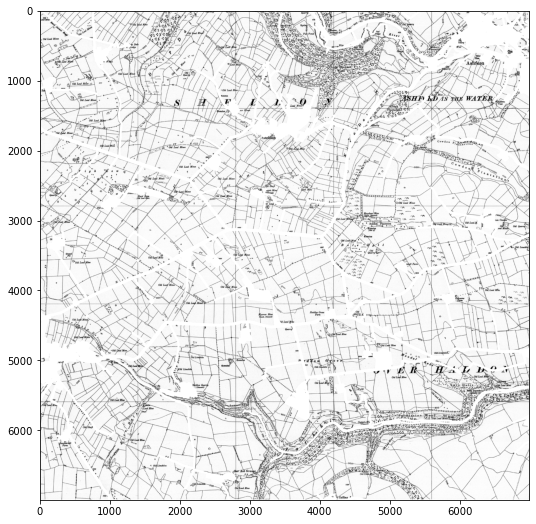

In [33]:
plt.figure(figsize=(9, 9))
plt.imshow(lyr, cmap='gray')

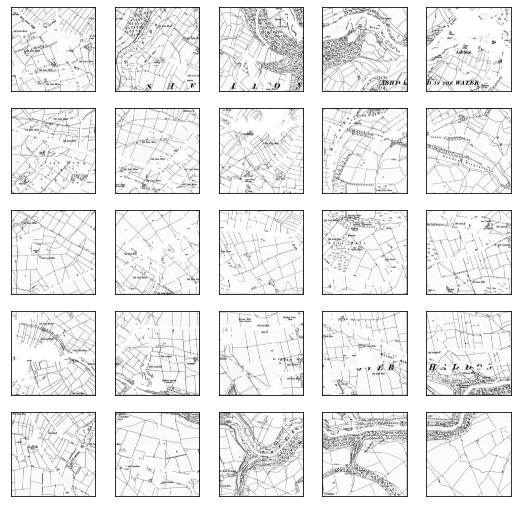

In [47]:
plt.figure(figsize=(9, 9))
square = 5
ix = 1
for i in range(square):
	for j in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot 
		plt.imshow(lcg[i, j, :, :], cmap='gray')
		ix += 1
# show the figure
plt.show()

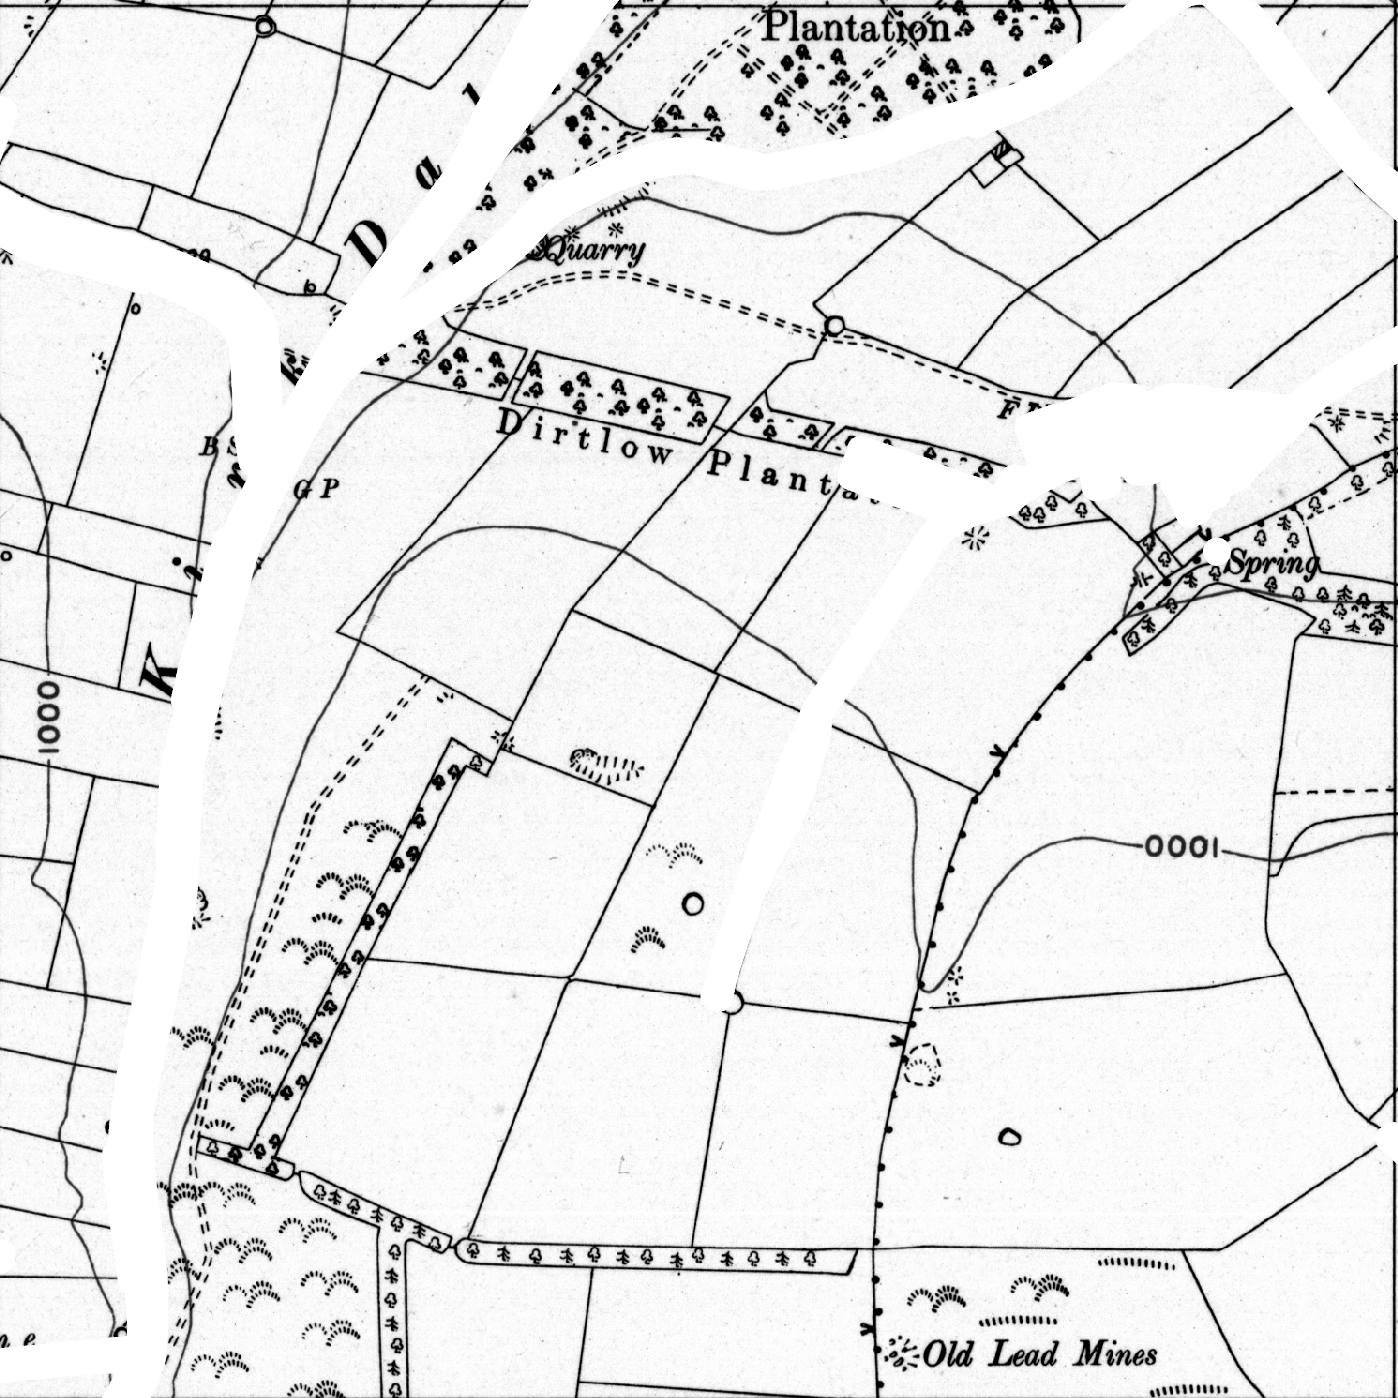

In [62]:

patch_img_arr = lcg[1,3,:,:] 
patch_img = Image.fromarray(patch_img_arr) 
display(patch_img)